In [68]:
# pip install ucimlrepo

In [67]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
  
chess_king_rook_vs_king = fetch_ucirepo(id=23) 
X = chess_king_rook_vs_king.data.features 
y = chess_king_rook_vs_king.data.targets 


# Przygotowanie danych

In [11]:
df = pd.merge(X, y, left_index=True, right_index=True)

In [12]:
df['white-depth-of-win'].unique()

array(['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six',
       'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
       'fourteen', 'fifteen', 'sixteen'], dtype=object)

In [13]:
df['black-king-file'].unique()

array(['c', 'd', 'e', 'f', 'g', 'h', 'a', 'b'], dtype=object)

In [14]:
df[['white-king-file', 'white-rook-file', 'black-king-file']] = df[['white-king-file', 'white-rook-file', 'black-king-file']].transform(lambda x: x.map({'a': 1,
 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8}))

In [15]:
df['white-depth-of-win'] = df['white-depth-of-win'].transform(lambda x: x.map({'draw': -1, 'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6,
       'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13,
       'fourteen': 14, 'fifteen': 15, 'sixteen': 16}))

In [16]:
df['euclidean_distance'] = np.sqrt((df['white-king-file'] - df['black-king-file'])**2 + (df['white-king-rank'] - df['black-king-rank'])**2)
df['manhattan_distance'] = np.abs(df['white-king-file'] - df['black-king-file']) + np.abs(df['white-king-rank'] - df['black-king-rank'])
df['chebyshev_distance'] = np.maximum(np.abs(df['white-king-file'] - df['black-king-file']), np.abs(df['white-king-rank'] - df['black-king-rank']))

In [17]:
df['bk_dist_edge'] = df[['black-king-file', 'black-king-rank']].apply(lambda x: min(x['black-king-file'] - 1, 8 - x['black-king-file'], x['black-king-rank'] - 1, 8 - x['black-king-rank']), axis=1)

In [18]:
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,euclidean_distance,manhattan_distance,chebyshev_distance,bk_dist_edge
0,1,1,2,3,3,2,-1,2.236068,3,2,1
1,1,1,3,1,3,2,-1,2.236068,3,2,1
2,1,1,3,1,4,1,-1,3.000000,3,3,0
3,1,1,3,1,4,2,-1,3.162278,4,3,1
4,1,1,3,2,3,1,-1,2.000000,2,2,0


# Zadanie 1

In [49]:
df11 = df.loc[df['white-depth-of-win'] == 0]

In [50]:
heatmap_data1 = pd.crosstab(df11['black-king-rank'], df11['black-king-file'])

In [51]:
heatmap_data1 = heatmap_data1.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)

In [52]:
df12 = df.loc[df['white-depth-of-win'] == -1]

In [53]:
heatmap_data2 = pd.crosstab(df12['black-king-rank'], df12['black-king-file'])

In [54]:
heatmap_data2 = heatmap_data2.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)

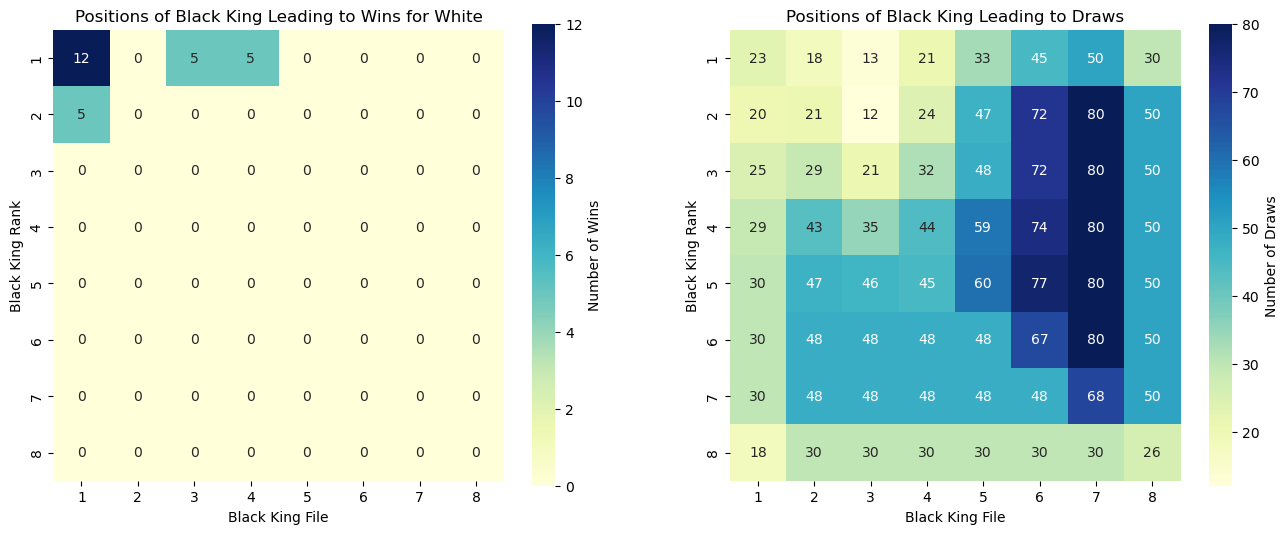

In [55]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('Positions of Black King Leading to Wins for White')
sns.heatmap(heatmap_data1, annot=True, fmt="d", cmap="YlGnBu", square=True, cbar_kws={'label': 'Number of Wins'})
plt.xlabel('Black King File')
plt.ylabel('Black King Rank')
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data2, annot=True, fmt="d", cmap='YlGnBu', square=True, cbar_kws={'label': 'Number of Draws'})
plt.title('Positions of Black King Leading to Draws')
plt.xlabel('Black King File')
plt.ylabel('Black King Rank')
plt.show()

### Odpowiedź do zadania 1

* Mat (depth=0): Wizualizacja potwierdza klasyczną teorię szachową - czarny król podczas matu znajduje się wyłącznie na krawędziach planszy, a najwięcej przypadków odnotowano w samych rogach. Jest to spowodowane tym, że wieża potrzebuje wsparcia krawędzi lub króla, aby odebrać wszystkie pola ucieczki przeciwnikowi.

* Remis (depth=-1): Sytuacje remisowe są rozłożone inaczej. Największe zagęszczenie występuje w obszarach, gdzie czarny król ma szansę na bezpośredni kontakt z figurami białych (często w centrum lub w pobliżu białego króla, który w tym zbiorze danych jest ograniczony do kwadratu a1-d4 ze względu na symetrię). Remisy te wynikają zazwyczaj z patu lub możliwości natychmiastowego zbicia wieży przez czarnego króla.

# Zadanie 2

In [56]:
df2 = df.loc[df['white-depth-of-win'] != -1, ]
corr_matrix1 = df2[['euclidean_distance', 'manhattan_distance', 'chebyshev_distance', 'white-depth-of-win']].corr()['white-depth-of-win'].drop('white-depth-of-win')


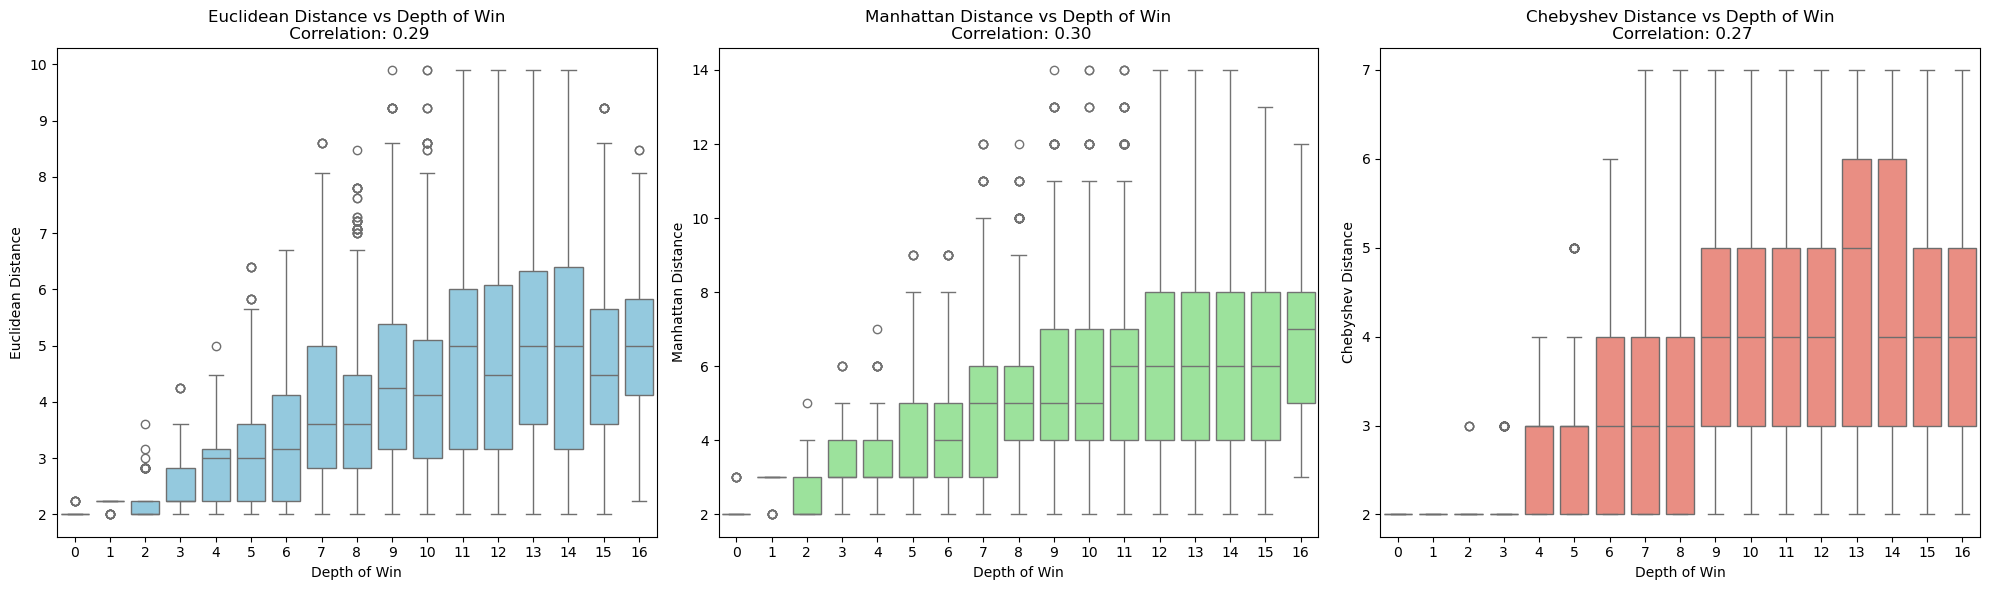

In [57]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='white-depth-of-win', y='euclidean_distance', data=df2, color='skyblue')
plt.title(f'Euclidean Distance vs Depth of Win\n Correlation: {corr_matrix1["euclidean_distance"]:.2f}')
plt.xlabel('Depth of Win')
plt.ylabel('Euclidean Distance')
plt.subplot(1, 3, 2)
sns.boxplot(x='white-depth-of-win', y='manhattan_distance', data=df2, color='lightgreen')
plt.title(f'Manhattan Distance vs Depth of Win\n Correlation: {corr_matrix1["manhattan_distance"]:.2f}')
plt.xlabel('Depth of Win')
plt.ylabel('Manhattan Distance')
plt.subplot(1, 3, 3)
sns.boxplot(x='white-depth-of-win', y='chebyshev_distance', data=df2, color='salmon')
plt.title(f'Chebyshev Distance vs Depth of Win\n Correlation: {corr_matrix1["chebyshev_distance"]:.2f}')
plt.xlabel('Depth of Win')
plt.ylabel('Chebyshev Distance')
plt.tight_layout()
plt.show()

### Odpowiedź do zadania 2

Najlepiej do oszacowania liczby ruchów nadaje się metryka Manhattan. Wynika to z faktu, że ruchy figur w szachach (szczególnie króla i wieży) często odbywają się wzdłuż linii i kolumn, co metryka Manhattan oddaje lepiej niż odległość w linii prostej dla meryki euklidesowej czy maksymalny dystans w jednym z kierunków dla metryki Czebyszewa. Choć korelacja rzędu 0.3 jest umiarkowana, wskazuje ona, że zbliżanie białego króla do czarnego jest niezbędnym, ale nie jedynym elementem procesu matowania.

# Zadanie 3

In [58]:
df3 = df.loc[df['white-depth-of-win'] != -1, ]
corr_matrix2 = df3[['bk_dist_edge', 'white-depth-of-win']].corr()['white-depth-of-win'].drop('white-depth-of-win')


In [59]:
print(f'Correlation between Black King Distance to Edge and Depth of Win: {corr_matrix2["bk_dist_edge"]:.2f}')

Correlation between Black King Distance to Edge and Depth of Win: 0.51


In [60]:
corr_matrix3 = df3[['white-depth-of-win', 'euclidean_distance', 'manhattan_distance', 'chebyshev_distance', 'bk_dist_edge']].corr()

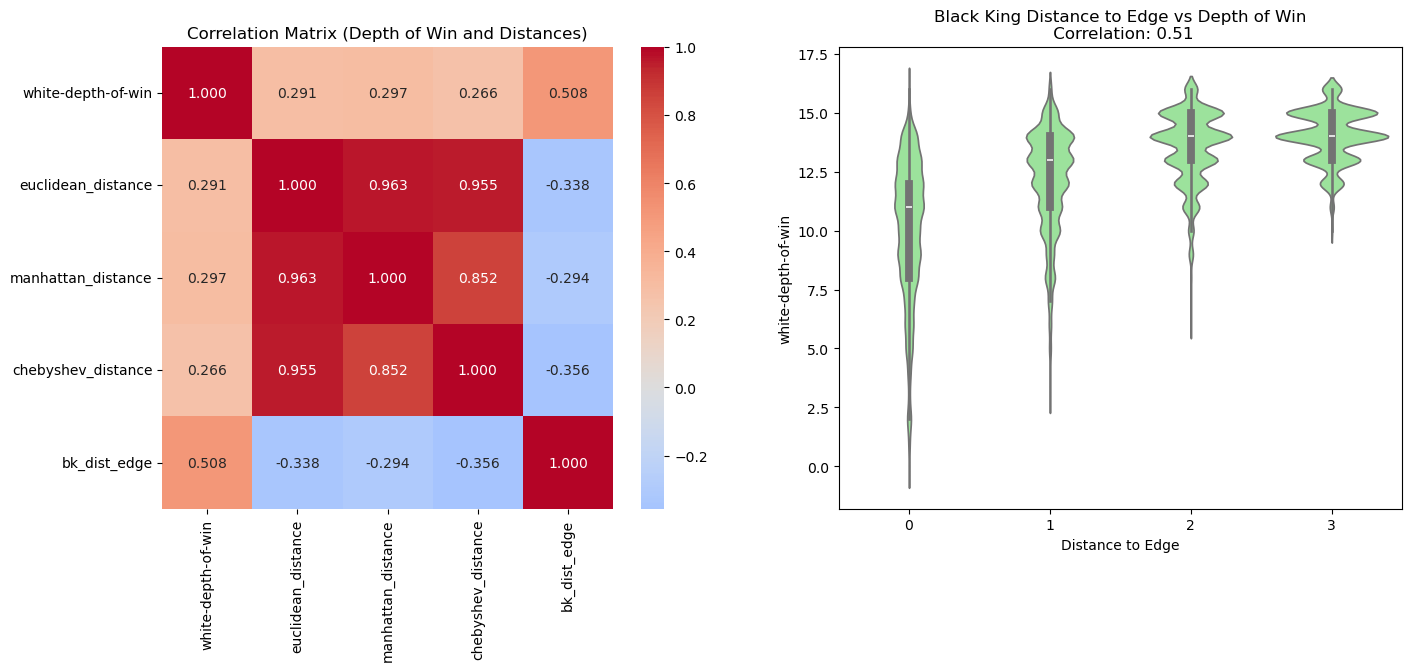

In [66]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm', center=0, fmt=".3f")
plt.title('Correlation Matrix (Depth of Win and Distances)')
plt.subplot(1,2,2)
sns.violinplot(y='white-depth-of-win', x='bk_dist_edge', data=df3, color='lightgreen')
plt.title(f'Black King Distance to Edge vs Depth of Win\n Correlation: {corr_matrix2["bk_dist_edge"]:.2f}')
plt.xlabel('Distance to Edge')
plt.show()

### Odpowiedź do zadania 3

* Odległość od krawędzi znacznie silniejszą korelację z liczbą ruchów 0.508 niż dystans między królami. Na wykresie skrzypcowym wyraźnie widać, że im dalej czarny król znajduje się od krawędzi`, tym wyższa jest mediana liczby ruchów do matu.

* Macierz korelacji pokazuje, że odległość od krawędzi i dystans między królami nie są ze sobą w pełni skorelowane. O ile odległość od krawędzi mówi nam o stopniu "uwięzienia" czarnego króla, o tyle dystans między królami mówi o gotowości białych do zadania mata.